# 第二章 基础二维图

## 2.1 基础散点图的绘制

* 参数介绍

* 案例来源（一）(**Heap et al., 2019, Nature Communications**)：[Hydrothermal alteration of andesitic lava domes can lead to explosive volcanic behaviour](https://www.doi.org/10.1038/s41467-019-13102-8)

* 案例来源（二）（**Bennett et al., 2019, Nature**): [Deep roots for mid-ocean-ridge volcanoes revealed by plagioclase-hosted melt inclusions](https://www.doi.org/10.1038/s41586-019-1448-0)

### 参数介绍
* 符号大小
* 符号颜色
* [符号类型](https://matplotlib.org/api/markers_api.html?highlight=marker#module-matplotlib.markers)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# 创建画布
fig, ax = plt.subplots()
# 随机生成数据：x,y, 大小, 颜色
x, y, s, c = np.random.rand(4, 50)
s *= 10**2.  #大小是point的平方
scatter1=ax.scatter(x, y,c=c,s=s,alpha=0.5,marker='^',edgecolors='none')

# 符号: 'o'
x, y, s, c = np.random.rand(4, 50)
s *= 10**2.  #大小是point的平方
scatter2=ax.scatter(x, y,c=c,s=s,alpha=0.5,marker='o',edgecolors='none',linewidth=2)

# 符号: 'd'
x, y, s, c = np.random.rand(4, 50)
s *= 10**2.  #大小是point的平方
scatter3=ax.scatter(x, y,c=c,s=s,alpha=0.5,marker='d',edgecolors='none',linewidth=2, cmap='rainbow')
# plt.colorbar(scatter3)

plt.tight_layout()
plt.savefig('../../figures/Chapter2/Lecture2_1_base1.pdf')
plt.show()

<Figure size 640x480 with 1 Axes>

### 基础案例

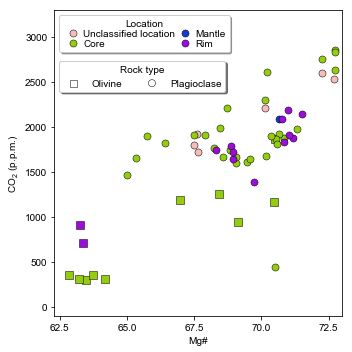

In [2]:
import pandas as pd
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体

fig=plt.figure(figsize=(5,5))
ax=plt.gca()
markersize=50
lw=0.5
data=pd.read_excel('data/Bennett2019_Nature/41586_2019_1448_MOESM5_ESM.xlsx',sheet_name='Panel b')
# print(data)
Mg=data['Mg number'].values
co2=data['CO2ppm '].values
Type=data['Inclusion type'].values
location=data['Crystal location (Core/Mantle/Rim)'].values
ind_P=(Type=='P')
ind_O=(Type=='O')
ind_C=(location=='C')
ind_R=(location=='R')
ind_M=(location=='M')
ind_o=~(ind_C | ind_R | ind_M)
ax.scatter(Mg[ind_o & ind_O],co2[ind_o & ind_O],marker='s',facecolor=(246/255,187/255,187/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Mg[ind_o & ind_P],co2[ind_o & ind_P],label='Unclassified location',marker='o',facecolor=(246/255,187/255,187/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Mg[ind_C & ind_O],co2[ind_C & ind_O],marker='s',facecolor=(147/255,205/255,13/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Mg[ind_C & ind_P],co2[ind_C & ind_P],label='Core',marker='o',facecolor=(147/255,205/255,13/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Mg[ind_M & ind_O],co2[ind_M & ind_O],marker='s',facecolor=(19/255,59/255,219/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Mg[ind_M & ind_P],co2[ind_M & ind_P],label='Mantle',marker='o',facecolor=(19/255,59/255,219/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Mg[ind_R & ind_O],co2[ind_R & ind_O],marker='s',facecolor=(157/255,13/255,218/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Mg[ind_R & ind_P],co2[ind_R & ind_P],label='Rim',marker='o',facecolor=(157/255,13/255,218/255),edgecolor='k',s=markersize,linewidth=lw)
ax.set_xlim(62.3,73)
ax.set_xlabel('Mg#')
ax.xaxis.set_major_locator(MultipleLocator(2.5))
ax.set_ylim(-100,3300)
ax.set_ylabel('CO$\mathregular{_2}$ (p.p.m.)')
# legend of location
leg_location=ax.legend(ncol=2,title='Location',frameon=True,columnspacing=0,labelspacing=0.1,handletextpad=0,loc='upper left',shadow=True)
ax.add_artist(leg_location)
# legend of rock type
rock1=ax.scatter(Mg[ind_o & ind_O]*1000,co2[ind_o & ind_O],label='Olivine',marker='s',facecolor='none',edgecolor='k',s=markersize,linewidth=lw)
rock2=ax.scatter(Mg[ind_o & ind_P]*1000,co2[ind_o & ind_P],label='Plagioclase',marker='o',facecolor='none',edgecolor='k',s=markersize,linewidth=lw)
leg_rock=plt.legend(handles=(rock1,rock2),title='Rock type',markerfirst=True,shadow=True,ncol=2,
           loc='upper left',bbox_to_anchor=(0, 0.85))
ax.add_artist(leg_rock)
# ax.text(0.09,4e-12,'Unaltered',ha='right')

plt.tight_layout()
# 保存图片
plt.savefig('../../figures/Chapter2/BasicExample.pdf')
plt.show()

### 进阶案例

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体:['dejavusans', 'dejavuserif', 'cm', 'stix', 'stixsans', 'custom']
# 用于计算散点的轮廓: 下面提供两种方案
from scipy.spatial import ConvexHull #方案1
# from descartes import PolygonPatch #方案2
# import alphashape
from matplotlib.patches import Rectangle,Polygon
from matplotlib.collections import PatchCollection
from matplotlib.ticker import MultipleLocator

["18°50'E BR" '2°W AVR' '31°E BR' '39°E BAS' '3°E SM' '48°E DSF' '57°E AVR'
 '72°E AVR' '84°E SM' 'EPR' 'GSC' 'JDF' 'MAR'] ['Bennett et al. 2019' 'Colman et al. 2015' 'Shaw et al. 2010'
 'Wanless and Shaw 2012' 'Wanless et al. 2014']


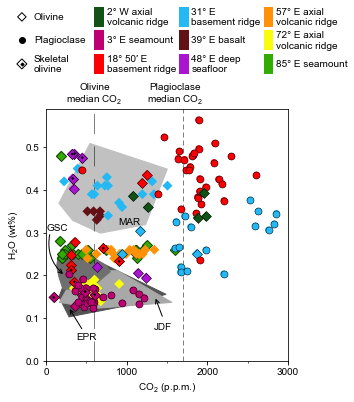

In [28]:
def plot_location(ax,x,y,location,loc,mfc='red',mec='red',s=50,label='',region=False,regioncolor='lightgrey'):
    ind=((location==loc) & (x<3000))
    if(region==False):
        ind_Olivine=(Olivine_plagioclase=='O') & ind
        ind_SkeletalOlivine=((Olivine_plagioclase=='O') &(Skeletal_olivine=='y')) & ind
        ind_Plagioclase=(Olivine_plagioclase=='P') & ind
        ind_this=(Source == 'Bennett et al. 2019') # black edge
        ind_ref2=(Source == 'Shaw et al. 2010') # green edge
        # Olivine: D
        ax.scatter(x[ind_Olivine],y[ind_Olivine],marker='D',s=s,edgecolor='none',facecolor=mfc,linewidth=0.5,label=label)
        ax.scatter(x[ind_Olivine & ind_this],y[ind_Olivine & ind_this],marker='D',s=s,edgecolor='k',facecolor=mfc,linewidth=0.5,label=label)
        ax.scatter(x[ind_Olivine & ind_ref2],y[ind_Olivine & ind_ref2],marker='D',s=s,edgecolor=(24/255,65/255,11/255),facecolor=mfc,linewidth=1,label=label)
        # Plagioclase: O
        ax.scatter(x[ind_Plagioclase],y[ind_Plagioclase],marker='o',s=s,edgecolor='none',facecolor=mfc,linewidth=0.5,label=label)
        ax.scatter(x[ind_Plagioclase & ind_this],y[ind_Plagioclase & ind_this],marker='o',s=s,edgecolor='k',facecolor=mfc,linewidth=0.5,label=label)
        ax.scatter(x[ind_Plagioclase & ind_ref2],y[ind_Plagioclase & ind_ref2],marker='o',s=s,edgecolor=(24/255,65/255,11/255),facecolor=mfc,linewidth=1,label=label)
        # Skeletal olivine: D-d
        ax.scatter(x[ind_SkeletalOlivine],y[ind_SkeletalOlivine],marker='D',s=s,edgecolor='none',facecolor=mfc,linewidth=0.5,label=label)
        ax.scatter(x[ind_SkeletalOlivine & ind_this],y[ind_SkeletalOlivine & ind_this],marker='D',s=s,edgecolor='k',facecolor=mfc,linewidth=0.5,label=label)
        ax.scatter(x[ind_SkeletalOlivine & ind_ref2],y[ind_SkeletalOlivine & ind_ref2],marker='D',s=s,edgecolor=(24/255,65/255,11/255),facecolor=mfc,linewidth=1,label=label)
        ax.scatter(x[ind_SkeletalOlivine],y[ind_SkeletalOlivine],marker='D',s=s/10,edgecolor='none',facecolor='k',linewidth=0.5,label=label)
    else:
        # get and plot boundary 
        allPoints=np.column_stack((x[ind],y[ind]))
        # 方案1
        hullPoints = ConvexHull(allPoints)
        pts_bound=allPoints[hullPoints.vertices,:]
        polygon = Polygon(pts_bound, True)
        patches=[]
        patches.append(polygon)
        region=ax.add_collection(PatchCollection(patches, alpha=1,color=regioncolor))
        #     #方案2
        #     alpha_shape = alphashape.alphashape(allPoints, 0.000003)
        #     ax.add_patch(PolygonPatch(alpha_shape, alpha=0.2))
data2=pd.read_excel('data/Bennett2019_Nature/41586_2019_1448_MOESM2_ESM.xlsx')
# print(data2)
h2o=data2['H2O wt.%'].values
co2=data2['CO2ppm '].values
location=data2['Location'].values
Olivine_plagioclase=data2['Olivine/plagioclase'].values
Skeletal_olivine=data2['Skeletal olivine'].values
Source=data2['Source'].values
print(np.unique(location),np.unique(Source))

fig,axs=plt.subplots(2,1,figsize=(5,5.7),gridspec_kw={"width_ratios":[1],"height_ratios":[0.8,3]})
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])
# fig=plt.figure(figsize=(6,5))
# ax=plt.gca()
ax=axs[1]
# 1. 设置坐标轴属性
ax.set_xlim(0,3000)
ax.set_ylim(0,0.59)
ax.xaxis.set_major_locator(MultipleLocator(1000))
ax.xaxis.set_minor_locator(MultipleLocator(500))
ax.set_xlabel('CO$\mathregular{_2}$ (p.p.m.)')
ax.set_ylabel('H$\mathregular{_2}$O (wt%)')

# 2. 绘制四个采样点集中且有很多重叠的区域
# MAR
plot_location(ax,co2,h2o,location,'MAR',region=True,regioncolor=(193/255,193/255,193/255))
# EPR
plot_location(ax,co2,h2o,location,'EPR',region=True,regioncolor=(83/255,83/255,83/255))
# JDF
plot_location(ax,co2,h2o,location,'JDF',region=True,regioncolor=(168/255,168/255,168/255))
# GSC
plot_location(ax,co2,h2o,location,'GSC',region=True,regioncolor=(111/255,111/255,111/255))

# 3. 绘制四个区域对应的文字
ax.text(600,0.6,'Olivine\nmedian CO$\mathregular{_2}$',ha='center')
ax.text(1600,0.6,'Plagioclase\nmedian CO$\mathregular{_2}$',ha='center')
ax.vlines(x=600,ymin=0,ymax=0.6,linestyles=(0,(40,25)),linewidth=0.5,zorder=1)
ax.vlines(x=1700,ymin=0,ymax=0.6,linestyles=(0,(10,6)),linewidth=0.5,zorder=1)
ax.text(900,0.32,'MAR')
ax.annotate('EPR',xy=(280,0.125), xycoords='data',xytext=(380,0.05), textcoords='data',
            arrowprops=dict(arrowstyle="->"))
ax.annotate('',xy=(1350,0.15), xycoords='data',xytext=(1450,0.1), textcoords='data',
            arrowprops=dict(arrowstyle="->"))
ax.text(1450,0.09,'JDF',ha='center',va='top')
ax.annotate('',
            xy=(230, 0.2), xycoords='data',
            xytext=(50, 0.3), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=.3"))
ax.text(10,0.3,'GSC',va='bottom',ha='left')

# 4. 绘制不同采样位置、不同岩石属性的散点. 颜色区分采样位置，散点符号区分岩石属性
colors=[]
labels=[]
# 85° E seamount
colors.append((50/255,172/255,2/255))
labels.append('85° E seamount')
plot_location(ax,co2,h2o,location,'84°E SM',mfc=colors[-1],label=labels[-1])
# 72°E AVR
colors.append((248/255,252/255,13/255))
labels.append('72° E axial\nvolcanic ridge')
plot_location(ax,co2,h2o,location,'72°E AVR',mfc=colors[-1],label=labels[-1])
# 57°E AVR
colors.append((253/255,146/255,9/255))
labels.append('57° E axial\nvolcanic ridge')
plot_location(ax,co2,h2o,location,'57°E AVR',mfc=colors[-1],label=labels[-1])
# 48°E DSF
colors.append((170/255,20/255,209/255))
labels.append('48° E deep\nseafloor')
plot_location(ax,co2,h2o,location,'48°E DSF',mfc=colors[-1],label=labels[-1])
# 39°E BAS
colors.append((99/255,17/255,22/255))
labels.append('39° E basalt')
plot_location(ax,co2,h2o,location,'39°E BAS',mfc=colors[-1],label=labels[-1])
# 31°E BR
colors.append((36/255,184/255,245/255))
labels.append('31° E\nbasement ridge')
plot_location(ax,co2,h2o,location,'31°E BR',mfc=colors[-1],label=labels[-1])
# 18°50\'E BR
colors.append((251/255,0/255,5/255))
labels.append('18° 50′ E\nbasement ridge')
plot_location(ax,co2,h2o,location,'18°50\'E BR',mfc=colors[-1],label=labels[-1])
# 3°E SM
colors.append((189/255,0/255,114/255))
labels.append('3° E seamount')
plot_location(ax,co2,h2o,location,'3°E SM',mfc=colors[-1],label=labels[-1])
# 2°W AVR
colors.append((17/255,83/255,23/255))
labels.append('2° W axial\nvolcanic ridge')
plot_location(ax,co2,h2o,location,'2°W AVR',mfc=colors[-1],label=labels[-1])

# 5. legend: 手动生成自定义legend
ax=axs[0]
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.axis('off')
# legend of rock
x0=-0.1
y0=0.15
dy=0.35
dx=0.05
ax.scatter(x0,y0,marker='D',facecolor='none',edgecolor='k',s=50,clip_on=False,zorder=10)
ax.scatter(x0,y0,marker='D',facecolor='k',edgecolor='k',s=50/10,clip_on=False,zorder=10)
ax.text(x0+dx,y0,'Skeletal\nolivine',va='center',ha='left')
ax.scatter(x0,y0+dy,marker='o',facecolor='k',edgecolor='k',clip_on=False,zorder=10)
ax.text(x0+dx,y0+dy,'Plagioclase',va='center',ha='left')
ax.scatter(x0,y0+dy*2,marker='D',facecolor='none',edgecolor='k',clip_on=False,zorder=10)
ax.text(x0+dx,y0+dy*2,'Olivine',va='center',ha='left')
# legend of location
x0=0.2
width=0.04
height=0.3
for i in range(0,len(colors)):
    xx=x0+0.35*((i)//3)
    yy=0.7-0.35*((i)%3)
    rec=Rectangle((xx, yy), 0.04, 0.3, fc=colors[8-i])
    ax.add_patch(rec)
    ax.text(xx+width+0.01,yy+height/2,labels[8-i],va='center')

plt.tight_layout()
# 保存图片
plt.savefig('../../figures/Chapter2/Bennett_2019_1.pdf')
plt.show()

### 练习1

/Users/zguo/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide


['MORB' 'Olv. Mi' 'Plag. MI']


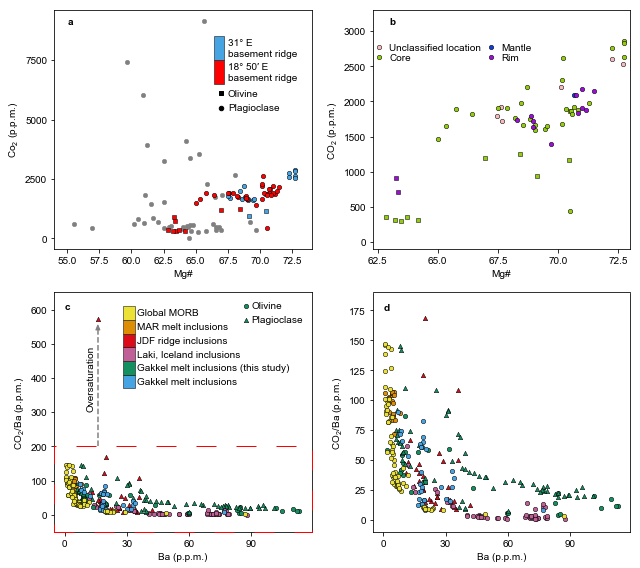

In [375]:

fig,axs=plt.subplots(2,2,figsize=(9,8))

# panel a
data5=pd.read_excel('data/Bennett2019_Nature/41586_2019_1448_MOESM5_ESM.xlsx',sheet_name='Panel a ')
# print(data5)
Mg=data5['MgNum'].values
co2=data5['CO2ppm ']
Type=data5['Type'].values
location=data5['Location'].values
ax=axs[0][0]
ax.set_xlim(54,74)
ax.yaxis.set_major_locator(MultipleLocator(2500))
ax.set_xlabel('Mg#')
ax.set_ylabel('Co$\mathregular{_2}$ (p.p.m.)')
markersize=20
lw=0.5
ind_ESB=(location=='ESB')
ind_VTSMZ=(location=='VTSMZ')
ind_JDF=~(ind_ESB | ind_VTSMZ)
ind_P=(Type=='P')
ind_O=(Type=='O')
ax.scatter(Mg[ind_JDF],co2[ind_JDF],marker='o',facecolor='grey',edgecolor='grey',s=markersize,linewidth=lw)
ax.scatter(Mg[ind_ESB & ind_O],co2[ind_ESB & ind_O],marker='s',facecolor=(71/255,164/255,227/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Mg[ind_ESB & ind_P],co2[ind_ESB & ind_P],marker='o',facecolor=(71/255,164/255,227/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Mg[ind_VTSMZ & ind_O],co2[ind_VTSMZ & ind_O],marker='s',facecolor='r',edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Mg[ind_VTSMZ & ind_P],co2[ind_VTSMZ & ind_P],marker='o',facecolor='r',edgecolor='k',s=markersize,linewidth=lw)
ax.text(55,9000,'a',fontweight='bold')
# legend
x0=67
y0=5500
dx=0.5
ax.scatter(x0,y0,marker='o',facecolor='k',edgecolor='k',s=markersize)
ax.text(x0+dx,y0,'Plagioclase',va='center')
ax.scatter(x0,y0+600,marker='s',facecolor='k',edgecolor='k',s=markersize)
ax.text(x0+dx,y0+600,'Olivine',va='center')
width=0.8
height=1000
dy=1000
rec=Rectangle((x0-width/2-0.2, y0+dy), width, height, fc='r',ec='k',linewidth=0.5)
ax.add_patch(rec)
ax.text(x0-width/2+width+0.1,y0+dy+height/2,'18° 50′ E\nbasement ridge',va='center')
rec=Rectangle((x0-width/2-0.2, y0+dy+height), width, height, fc=(71/255,164/255,227/255),ec='k',linewidth=0.5)
ax.add_patch(rec)
ax.text(x0-width/2+width+0.1,y0+dy+height+height/2,'31° E\nbasement ridge',va='center')

# panel b
ax=axs[0][1]
data=pd.read_excel('data/Bennett2019_Nature/41586_2019_1448_MOESM5_ESM.xlsx',sheet_name='Panel b')
# print(data)
Mg=data['Mg number'].values
co2=data['CO2ppm '].values
Type=data['Inclusion type'].values
location=data['Crystal location (Core/Mantle/Rim)'].values
ind_P=(Type=='P')
ind_O=(Type=='O')
ind_C=(location=='C')
ind_R=(location=='R')
ind_M=(location=='M')
ind_o=~(ind_C | ind_R | ind_M)
ax.scatter(Mg[ind_o & ind_O],co2[ind_o & ind_O],marker='s',facecolor=(246/255,187/255,187/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Mg[ind_o & ind_P],co2[ind_o & ind_P],label='Unclassified location',marker='o',facecolor=(246/255,187/255,187/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Mg[ind_C & ind_O],co2[ind_C & ind_O],marker='s',facecolor=(147/255,205/255,13/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Mg[ind_C & ind_P],co2[ind_C & ind_P],label='Core',marker='o',facecolor=(147/255,205/255,13/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Mg[ind_M & ind_O],co2[ind_M & ind_O],marker='s',facecolor=(19/255,59/255,219/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Mg[ind_M & ind_P],co2[ind_M & ind_P],label='Mantle',marker='o',facecolor=(19/255,59/255,219/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Mg[ind_R & ind_O],co2[ind_R & ind_O],marker='s',facecolor=(157/255,13/255,218/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Mg[ind_R & ind_P],co2[ind_R & ind_P],label='Rim',marker='o',facecolor=(157/255,13/255,218/255),edgecolor='k',s=markersize,linewidth=lw)
ax.set_xlim(62.3,73)
ax.set_xlabel('Mg#')
ax.xaxis.set_major_locator(MultipleLocator(2.5))
ax.set_ylim(-100,3300)
ax.set_ylabel('CO$\mathregular{_2}$ (p.p.m.)')
ax.legend(ncol=2,frameon=False,columnspacing=0,labelspacing=0.1,handletextpad=0,loc='upper left', bbox_to_anchor=(-0.05, 0.9))
ax.text(63,3100,'b',fontweight='bold')

# panel c
ax=axs[1][0]
data=pd.read_excel('data/Bennett2019_Nature/41586_2019_1448_MOESM5_ESM.xlsx',sheet_name='Panels c and d')
# print(data)
co2_Ba=data['CO2/Ba'].values
co2=data['CO2 ppm'].values
Ba=co2/co2_Ba
Type=data['Sample type '].values
location=data['Location '].values
source=data['Source'].values
print(np.unique(Type))
ind_P=(Type=='Plag. MI')
ind_O=(Type=='Olv. Mi')
ind_MAR=(location=='MAR')
ind_JDF=(location=='Juan de Fuca')
ind_Laki=(location=='Laki Iceland')
ind_Gakkel=((location=='Gakkel') & (source!='Bennett et al. 2019'))
ind_this=((location=='Gakkel') & (source=='Bennett et al. 2019'))
ind_MORB=(Type=='MORB')
ax.set_xlim(-5,119)
ax.xaxis.set_major_locator(MultipleLocator(30))
ax.set_ylim(-50,650)
ax.set_xlabel('Ba (p.p.m.)')
ax.set_ylabel('CO$\mathregular{_2}$/Ba (p.p.m.)')
ax.scatter(Ba[ind_MAR & ind_O],co2_Ba[ind_MAR & ind_O],marker='o',facecolor=(222/255,142/255,5/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Ba[ind_MAR & ind_P],co2_Ba[ind_MAR & ind_P],marker='^',facecolor=(222/255,142/255,5/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Ba[ind_JDF & ind_O],co2_Ba[ind_JDF & ind_O],marker='o',facecolor=(219/255,11/255,26/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Ba[ind_JDF & ind_P],co2_Ba[ind_JDF & ind_P],marker='^',facecolor=(219/255,11/255,26/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Ba[ind_Laki & ind_O],co2_Ba[ind_Laki & ind_O],marker='o',facecolor=(191/255,97/255,150/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Ba[ind_Laki & ind_P],co2_Ba[ind_Laki & ind_P],marker='^',facecolor=(191/255,97/255,150/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Ba[ind_this & ind_O],co2_Ba[ind_this & ind_O],label='Olivine',marker='o',facecolor=(19/255,143/255,96/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Ba[ind_this & ind_P],co2_Ba[ind_this & ind_P],label='Plagioclase',marker='^',facecolor=(19/255,143/255,96/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Ba[ind_Gakkel & ind_O],co2_Ba[ind_Gakkel & ind_O],marker='o',facecolor=(71/255,164/255,227/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Ba[ind_Gakkel & ind_P],co2_Ba[ind_Gakkel & ind_P],marker='^',facecolor=(71/255,164/255,227/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Ba[ind_MORB],co2_Ba[ind_MORB],marker='o',facecolor=(236/255,225/255,53/255),edgecolor='k',s=markersize,linewidth=lw)
labels=['Global MORB','MAR melt inclusions','JDF ridge inclusions','Laki, Iceland inclusions','Gakkel melt inclusions (this study)','Gakkel melt inclusions']
colors=[(236/255,225/255,53/255),(222/255,142/255,5/255),(219/255,11/255,26/255),(191/255,97/255,150/255),
       (19/255,143/255,96/255),(71/255,164/255,227/255)]
x0=28
y0=370
width=6
height=40
for i in range(0,len(labels)):
    rec=Rectangle((x0,y0+height*i), width, height, fc=colors[5-i],ec='k',linewidth=0.5)
    ax.add_patch(rec)
    ax.text(x0+width+1,y0+height*i+height/2,labels[5-i],va='center')
ax.legend(frameon=False,handletextpad=-0.5)
rec=Rectangle((-5,-50), 119+5, 250, fc='none',ec='r',linestyle=(10,(20,20)),linewidth=1,clip_on=False,zorder=10)
ax.add_patch(rec)
ax.text(0,600,'c',fontweight='bold')
ax.vlines(16,200,550,linestyle='--',color='grey')
ax.arrow(16,540,0,0,width=0.001, color="grey", head_width=2, head_length=15, overhang=0.1)
ax.text(15,400,'Oversaturation',rotation=90,va='center',ha='right')

# Panel d
ax=axs[1][1]
ax.set_xlim(-5,119)
ax.xaxis.set_major_locator(MultipleLocator(30))
ax.set_ylim(-10,190)
ax.set_xlabel('Ba (p.p.m.)')
ax.set_ylabel('CO$\mathregular{_2}$/Ba (p.p.m.)')
ax.scatter(Ba[ind_MAR & ind_O],co2_Ba[ind_MAR & ind_O],marker='o',facecolor=(222/255,142/255,5/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Ba[ind_MAR & ind_P],co2_Ba[ind_MAR & ind_P],marker='^',facecolor=(222/255,142/255,5/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Ba[ind_JDF & ind_O],co2_Ba[ind_JDF & ind_O],marker='o',facecolor=(219/255,11/255,26/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Ba[ind_JDF & ind_P],co2_Ba[ind_JDF & ind_P],marker='^',facecolor=(219/255,11/255,26/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Ba[ind_Laki & ind_O],co2_Ba[ind_Laki & ind_O],marker='o',facecolor=(191/255,97/255,150/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Ba[ind_Laki & ind_P],co2_Ba[ind_Laki & ind_P],marker='^',facecolor=(191/255,97/255,150/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Ba[ind_this & ind_O],co2_Ba[ind_this & ind_O],label='Olivine',marker='o',facecolor=(19/255,143/255,96/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Ba[ind_this & ind_P],co2_Ba[ind_this & ind_P],label='Plagioclase',marker='^',facecolor=(19/255,143/255,96/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Ba[ind_Gakkel & ind_O],co2_Ba[ind_Gakkel & ind_O],marker='o',facecolor=(71/255,164/255,227/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Ba[ind_Gakkel & ind_P],co2_Ba[ind_Gakkel & ind_P],marker='^',facecolor=(71/255,164/255,227/255),edgecolor='k',s=markersize,linewidth=lw)
ax.scatter(Ba[ind_MORB],co2_Ba[ind_MORB],marker='o',facecolor=(236/255,225/255,53/255),edgecolor='k',s=markersize,linewidth=lw)

ax.text(0,175,'d',fontweight='bold')


plt.tight_layout()
# 保存图片
plt.savefig('../../figures/Chapter2/Bennett_2019_2.pdf')
plt.show()

## 案例一

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体:['dejavusans', 'dejavuserif', 'cm', 'stix', 'stixsans', 'custom']

#### 美化
**假设我们已经知道了美化的方向（这个方向因人而异），这里将此方向定位方案一所提到的Nature Communications文章中的图1b**，也就是说这里我只讲解如何用python绘制出与原文中尽可能一致的图

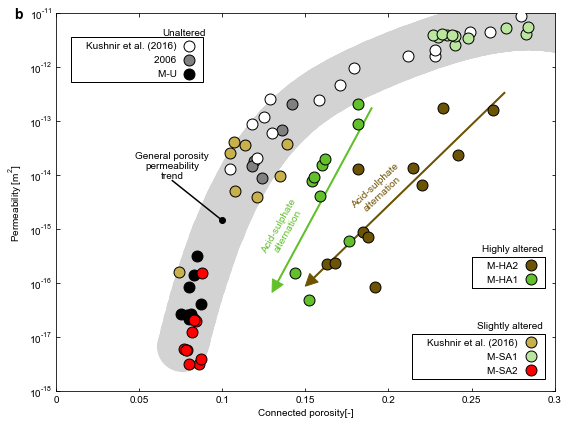

In [32]:
def plotCollections(ax,sample,name,fc,label=' ',ec='k',marker='o',ew=1.5,zorder=5):
    ind=(sample==1)
    for i in range(0,len(sample)):
        if(name in sample[i]):
            ind[i]=True
        else:
            ind[i]=False
    s=ax.scatter(x[ind],y[ind],s=120,zorder=zorder,edgecolor='k',facecolor=fc,label='    '+label)
    ax.semilogy()
    return s,x[ind],y[ind],ind
# 1. 读取数据
data=pd.read_csv('data/Heap_NC_2019/Heap_NC_2019.csv')
x=data['Connected porosity'].values
y=data['Permeability(m2)'].values
sample=data['Sample'].values

# 2. 创建画布
fig=plt.figure(figsize=(8,6))

# 3. 获取坐标轴对象
ax=plt.gca()

# 4. 绘制散点图
# ax.semilogy(x,y,'o')
ax.set_xlim(0,0.3)
ax.set_ylim(1e-18,1e-11)
# 第一组:Unaltered
# 4.1 M-U
s1,x0,y0,ind1=plotCollections(ax,sample,'M-U','k',label='M-U')
# 4.2 2006
s2,x0,y0,ind2=plotCollections(ax,sample,'2006','gray',label='2006')
# 4.2 2016
s3,x0,y0,ind3=plotCollections(ax,sample,'Kushnir_2016_2','w',label='Kushnir et al. (2016)')
# legend
borderpad=0.3
leg1=plt.legend(handles=(s3,s2,s1),markerfirst=False,bbox_to_anchor=(0.02, 0.95),handletextpad=borderpad,
           fancybox=False,edgecolor='k',framealpha=1,loc='upper left')
ax.add_artist(leg1)
ax.text(0.09,4e-12,'Unaltered',ha='right')

# 第二组:slightly Unaltered
# M-SA2
s4,x0,y0,ind4=plotCollections(ax,sample,'M-SA2','red',label='M-SA2')
# M-SA1
s5,x0,y0,ind5=plotCollections(ax,sample,'M-SA1',(186/255, 230/255, 159/255),label='M-SA1')
# 2016
s6,x0,y0,ind6=plotCollections(ax,sample,'Kushnir_2016_3',(200/255,176/255,77/255),label='Kushnir et al. (2016)')
leg2=plt.legend(handles=(s6,s5,s4),markerfirst=False,bbox_to_anchor=(0.99, 0.02),handletextpad=borderpad,
           fancybox=False,edgecolor='k',framealpha=1,loc='lower right')
ax.add_artist(leg2)
ax.text(0.293,1.5e-17,'Slightly altered',ha='right')

# 第三组：highly Unaltered
# M-HA1
color=(97/255,192/255,43/255)
s7,x0,y0,ind7=plotCollections(ax,sample,'M-HA1',color,label='M-HA1')
# 拟合趋势
xnew=np.linspace(0.13,0.19,20)
z = np.polyfit(x0, np.log10(y0), 1)
p = np.poly1d(z)

ynew=p(xnew)
ax.annotate('',
            xy=(xnew[0],10**ynew[0]), xycoords='data',
            xytext=(xnew[-1],10**ynew[-1]), textcoords='data',
            arrowprops=dict(width=1,facecolor=color,edgecolor=color))
# 计算图中显示的斜率用于文字的旋转
xdisplay1, ydisplay1 = ax.transData.transform_point((xnew[0], 10**ynew[0]))
xdisplay2, ydisplay2 = ax.transData.transform_point((xnew[-1], 10**ynew[-1]))
dy=ydisplay1-ydisplay2
dx=xdisplay1-xdisplay2
ax.text(0.137,10**p(0.151),'Acid-sulphate\nalternation',rotation=np.arctan((dy/dx))/np.pi*180,
        ha='center',va='center',color=color)

# M-HA2
color=(109/255,84/255,4/255)
s8,x0,y0,ind8=plotCollections(ax,sample,'M-HA2',color,label='M-HA2')
# 拟合趋势
xnew=np.linspace(0.15,0.27,20)
z = np.polyfit(x0, np.log10(y0), 1)
p = np.poly1d(z)
ynew=p(xnew)
ax.annotate('',
            xy=(xnew[0],10**ynew[0]), xycoords='data',
            xytext=(xnew[-1],10**ynew[-1]), textcoords='data',
            arrowprops=dict(width=1,facecolor=color,edgecolor=color))
# 计算图中显示的斜率用于文字的旋转
xdisplay1, ydisplay1 = ax.transData.transform_point((xnew[0], 10**ynew[0]))
xdisplay2, ydisplay2 = ax.transData.transform_point((xnew[-1], 10**ynew[-1]))
dy=ydisplay1-ydisplay2
dx=xdisplay1-xdisplay2
ax.text(0.194,10**p(0.21),'Acid-sulphate\nalternation',rotation=np.arctan((dy/dx))/np.pi*180,
        ha='center',va='center',color=color)

leg3=plt.legend(handles=(s8,s7),markerfirst=False,bbox_to_anchor=(0.99, 0.26),handletextpad=borderpad,
           fancybox=False,edgecolor='k',framealpha=1,loc='lower right')
ax.add_artist(leg3)
ax.text(0.293,4e-16,'Highly altered',ha='right')

# # 绘制灰色趋势区域
ind=~(ind7 | ind8)
xnew=np.linspace(np.min(x[ind])+0.002,np.max(x[ind]),1000)
z = np.polyfit(x[ind], np.log10(y[ind]), 7)
p = np.poly1d(z)
ynew=p(xnew)

# ax.semilogy(xnew,10**ynew,linewidth=50,color='lightgray')
ax.semilogy(xnew,10**ynew,'o',color='lightgray',markersize=50)
# ax.semilogy(xnew[0]-0.005,10**p(xnew[0]-0.005),'o',color='lightgray',markersize=50)
# 标注文字
ax.text(0.07,8e-15,'General porosity\npermeability\ntrend',va='bottom',ha='center')
ax.plot(0.1,10**p(0.1),'o',markerfacecolor='k',markeredgecolor='k')
ax.plot([0.07, 0.1],[8e-15,10**p(0.1)],color='k')

# 5. 标注坐标轴
ax.set_xlabel('Connected porosity[-]')
ax.set_ylabel('Permeability [m$\mathregular{^{2}}$]')

# 6. 设置坐标轴刻度向内
ax.tick_params(direction='in',axis='both')
ax.yaxis.set_minor_locator(plt.NullLocator())
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.set_xticks(np.arange(0,0.31,0.05))
ax.set_xticklabels(['0','0.05','0.1','0.15','0.2','0.25','0.3'])
ax.text(-0.025,8e-12,'b',fontsize=14,fontweight='bold')

plt.tight_layout()
# 保存图片
plt.savefig('../../figures/Chapter2/Heap_NC_2019.pdf')
# 显示
plt.show()